## !! Importing Libraries  
Here, we import all necessary Python libraries for data manipulation, visualization, and modeling.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ^^ Loading & Exploring the Dataset  
We load the employee dataset and take an initial look to understand its structure and contents.


In [ ]:
df=pd.read_csv("employee.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## ~~ Data Cleaning  
**Note:** This dataset was already quite clean and well-structured when downloaded.  
There were no missing values or obvious outliers, so minimal cleaning was required.  
We only removed a few constant or non-informative columns like `EmployeeCount`, `EmployeeNumber`, `Over18`, and `StandardHours`.


In [ ]:
#removing attributes which will be no use for us
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

## ** Encoding Categorical Variables  
We convert categorical variables into numeric format using label encoding and one-hot encoding.


In [ ]:
#Binary: Attrition, Gender, Overtime
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['OverTime']=df['OverTime'].map({'No':0,'Yes':1})
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

In [ ]:
#now onehot encoding : bussiness travel,department,EducationField,jobrole,marital status
df=pd.get_dummies(df,columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],prefix=['BT', 'Dept', 'Edu', 'Role', 'MS'], drop_first=True)

In [ ]:
bool_cols=df.select_dtypes(include="bool").columns
df[bool_cols]=df[bool_cols].astype(int)


In [ ]:
print(df['Attrition'].value_counts())
print(df['Attrition'].value_counts(normalize = True) * 100)


Attrition
0    1233
1     237
Name: count, dtype: int64
Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


## 📈 Exploratory Data Analysis (EDA)  
Here we visualize correlations, class imbalance, and feature relationships with attrition.


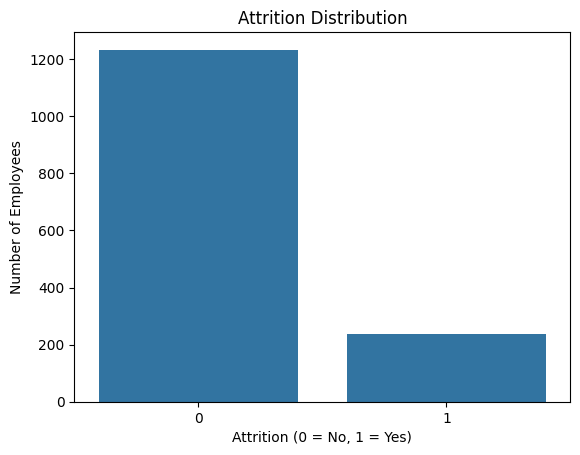

In [ ]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.show()


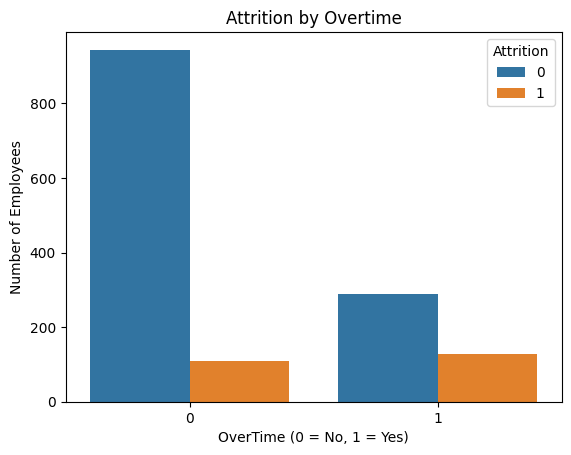

In [ ]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by Overtime')
plt.xlabel('OverTime (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()


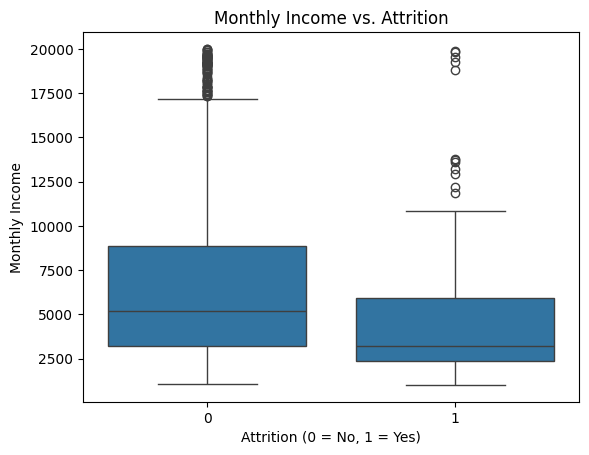

In [ ]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Monthly Income')
plt.show()


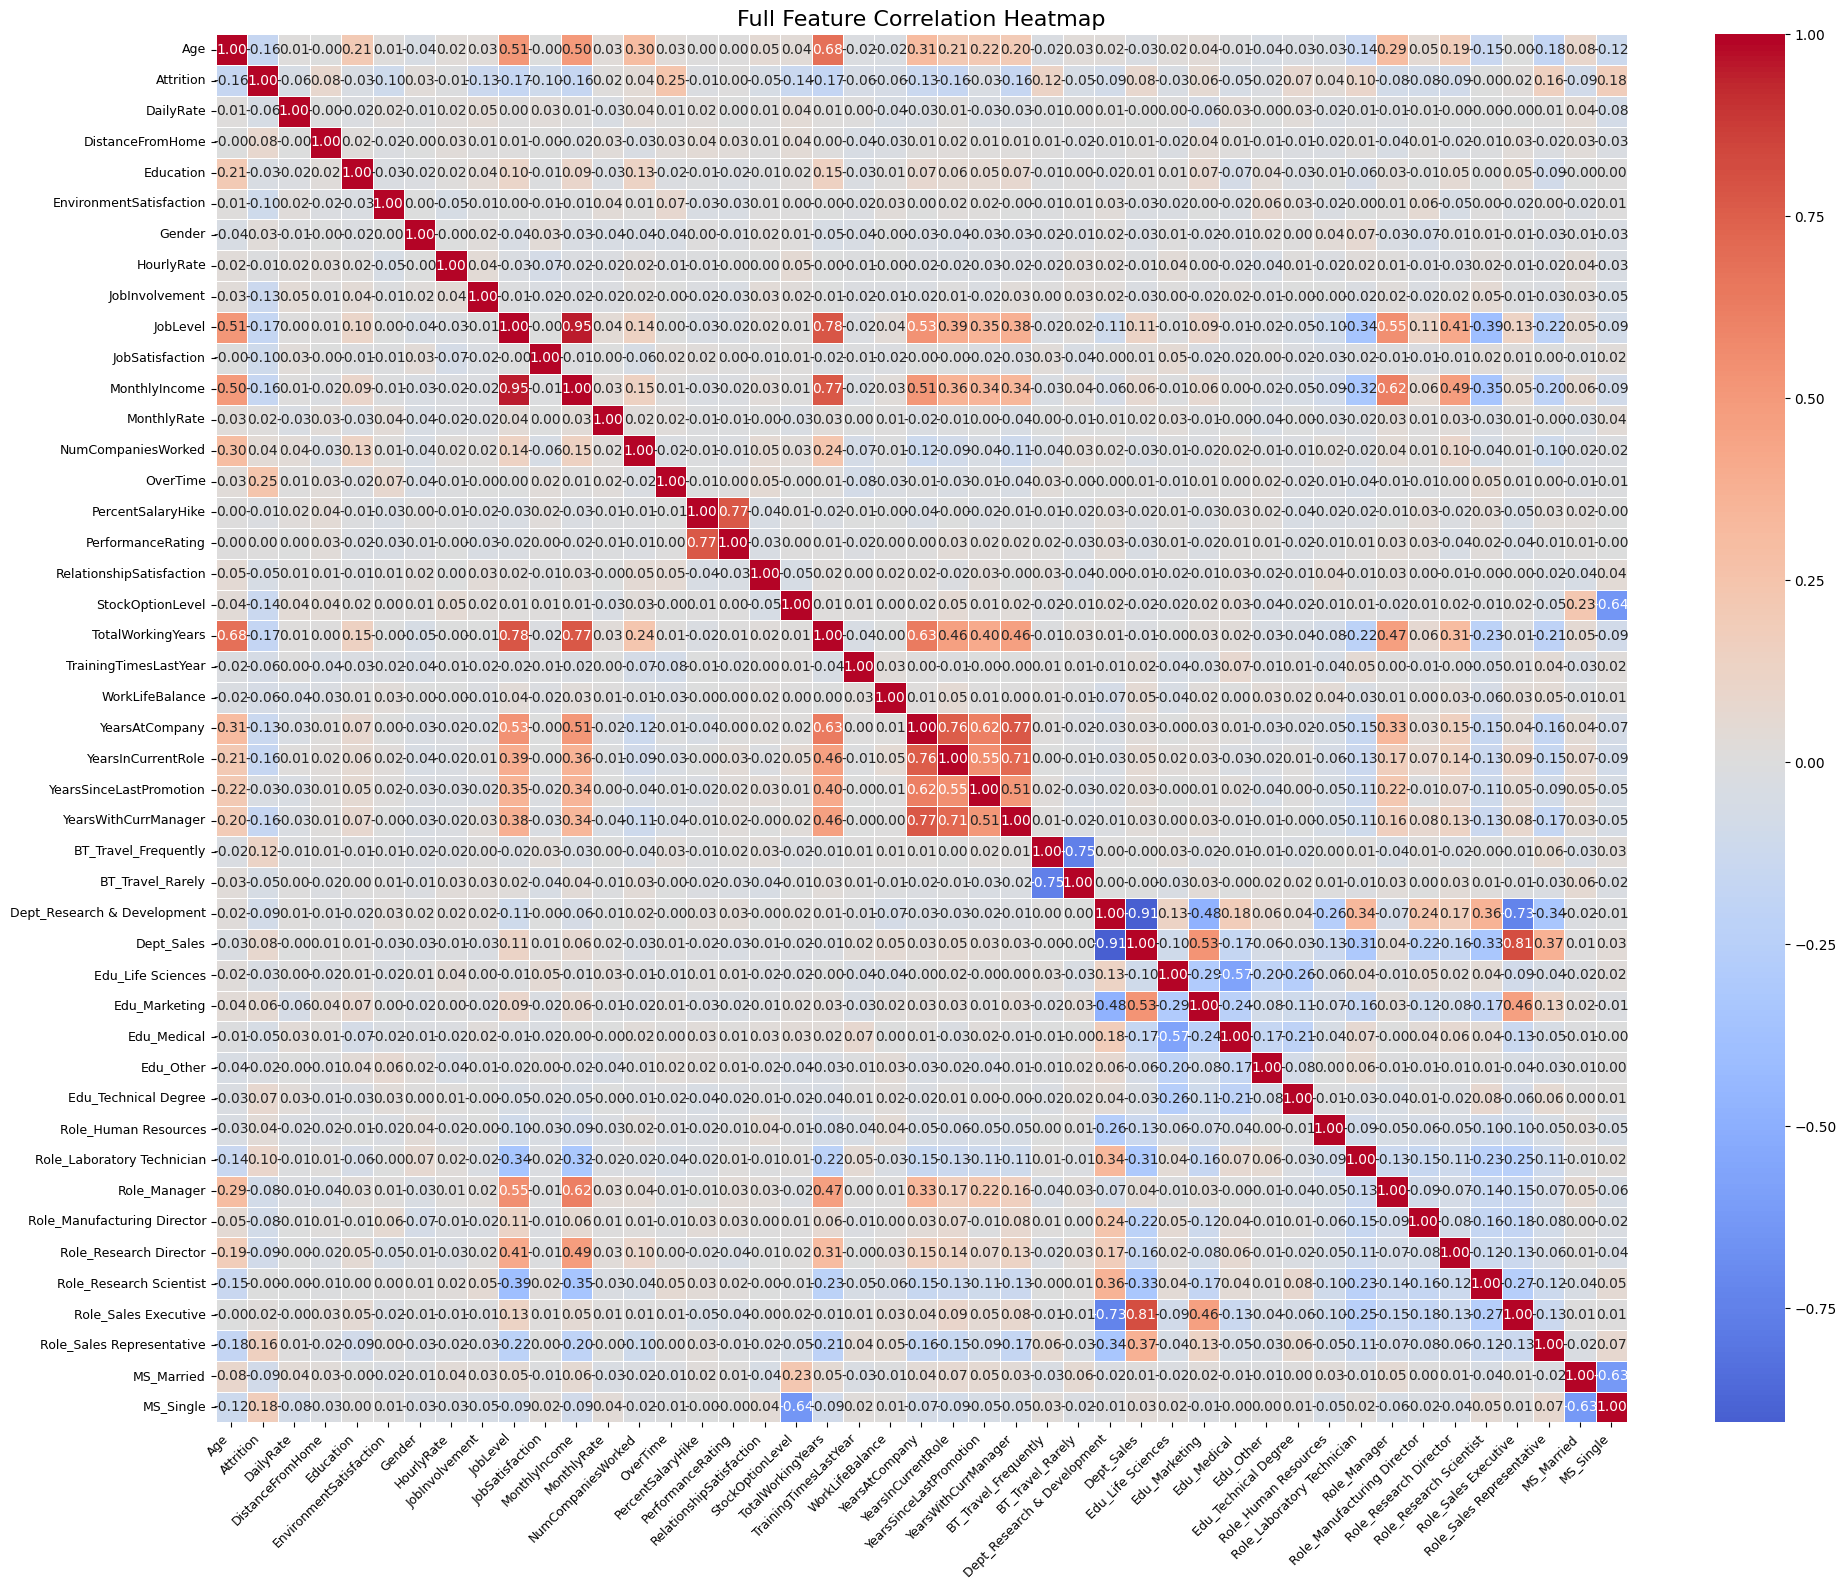

In [ ]:
plt.figure(figsize=(20, 16))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

plt.title('Full Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


## **Model 1: Logistic Regression  **

## ** Splitting & Scaling Data  
We split the dataset and apply feature scaling to prepare for training.


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



X=df.drop('Attrition',axis=1)
y=df['Attrition']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)



In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294



## **Model 2  : Random Forest **

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294



## ✅ Final Comparison & Conclusion

After training and evaluating both models — Logistic Regression and Random Forest — here are the key insights:

### 🔍 Performance Summary:

| Metric         | Logistic Regression | Random Forest |
|----------------|---------------------|----------------|
| Accuracy       | ~75%                | ~83%           |
| Precision (Class 1 - Attrition) | 0.35               | 0.40           |
| Recall (Class 1 - Attrition)    | 0.62               | 0.09           |
| F1-Score (Class 1)              | 0.44               | 0.14           |

> 📌 Class 1 = Employees who left (churned)

---

### * Interpretation:

- **Logistic Regression** performs **more balanced** between classes, especially for predicting employees who leave (Attrition = 1).
- **Random Forest** has **higher overall accuracy**, but performs **poorly on the minority class (Attrition = 1)**. This is likely due to class imbalance.
- Both models suffer due to the **imbalanced nature of the dataset**, where only ~16% of employees actually left.

---

### * Feature Influence:

- Based on visualizations and correlation:
  - `OverTime`, `JobSatisfaction`, `MonthlyIncome`, `WorkLifeBalance`, and `JobRole` play significant roles.
  - Employees with **high overtime**, **low satisfaction**, or **lower income** are more likely to leave.
  
---

### * Next Steps for Future:

- Apply **SMOTE** or **resampling** to balance the dataset.
- Try other models like **XGBoost**, **Gradient Boosting**, or **SVM**.
- Perform **hyperparameter tuning** for better results.

---

### ✅ Final Verdict:

- If the goal is **understanding churn factors**, use **Logistic Regression**.
- If the goal is **overall prediction accuracy**, Random Forest performs better — but needs tuning for minority class.
